## #1 Keras API Project Exercise

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### The Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), I want to build a model that can predict wether or not a borrower will pay back their loan. This way in the future when I get a new potential customer I can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains the label.

### Loading the Data and other imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### Data Viz and analysis

<Axes: xlabel='loan_status', ylabel='count'>

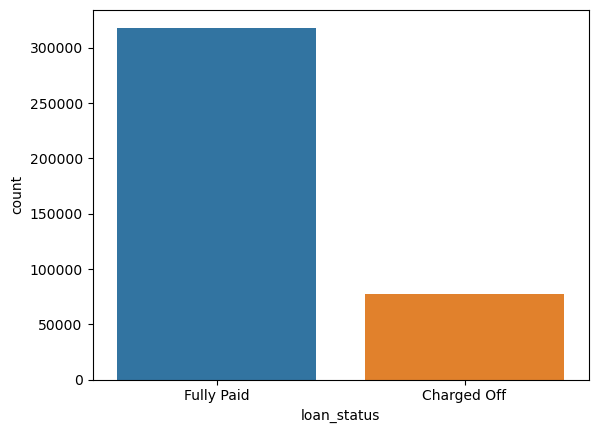

In [6]:
sns.countplot(data=df, x='loan_status') ##Countplot for the label column, i.e. loan_status

C:\Users\bhati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_amnt', ylabel='Count'>

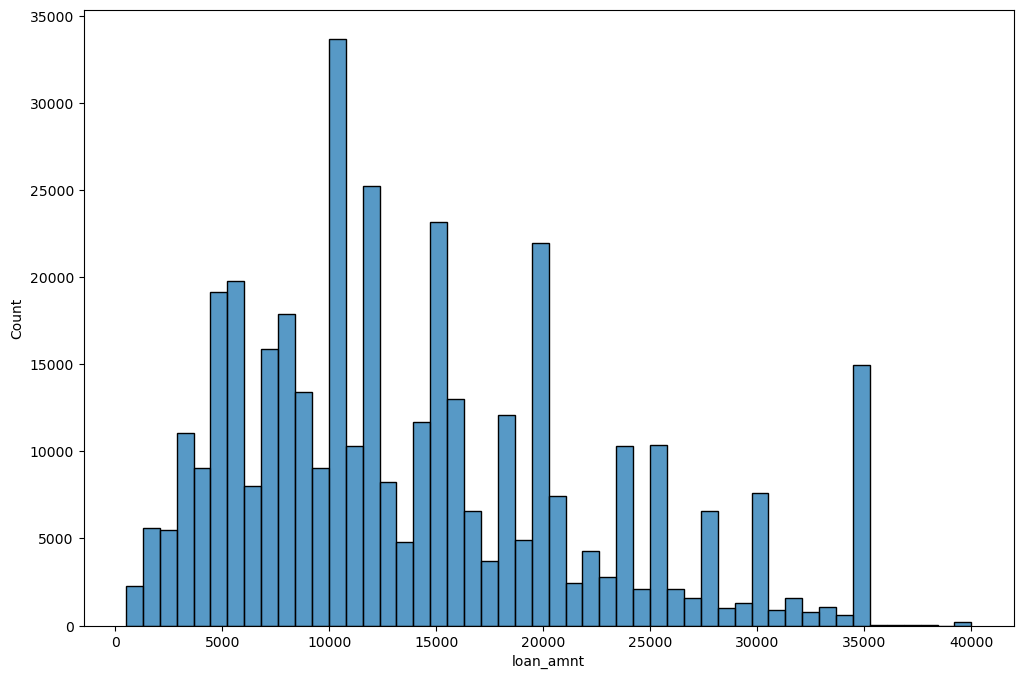

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='loan_amnt', bins=50) ##Histogram for the loan amount

In [8]:
##Let us check the correlation between the contunoyos variables
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

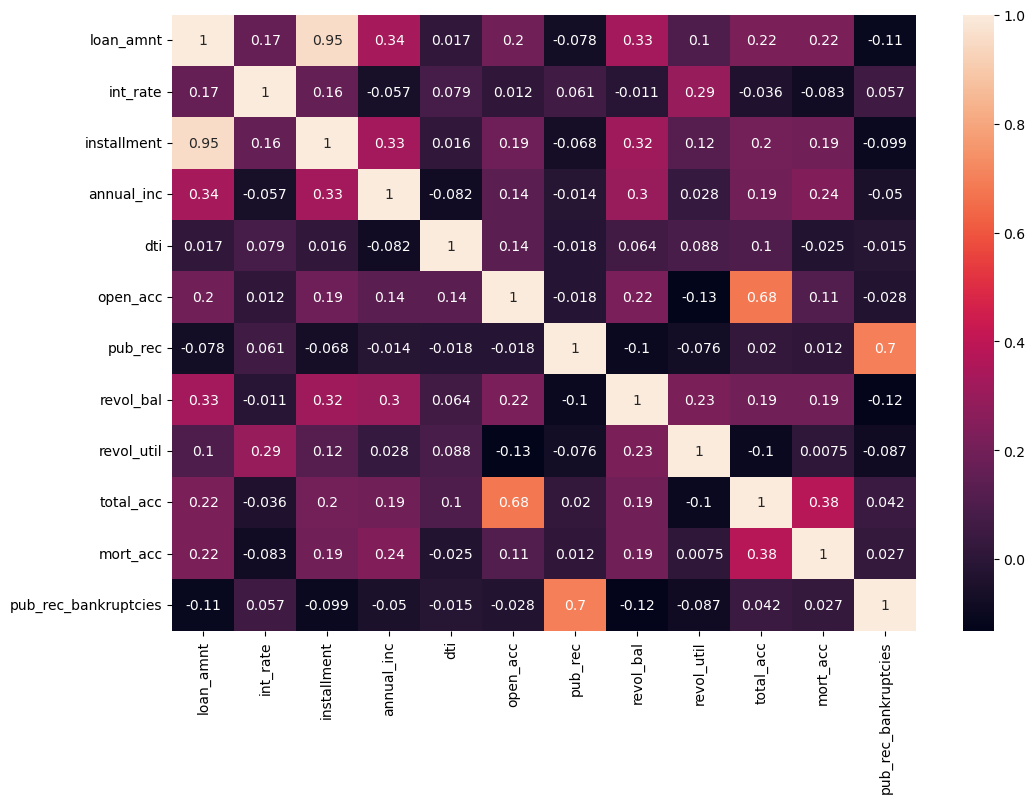

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

<Axes: xlabel='installment', ylabel='loan_amnt'>

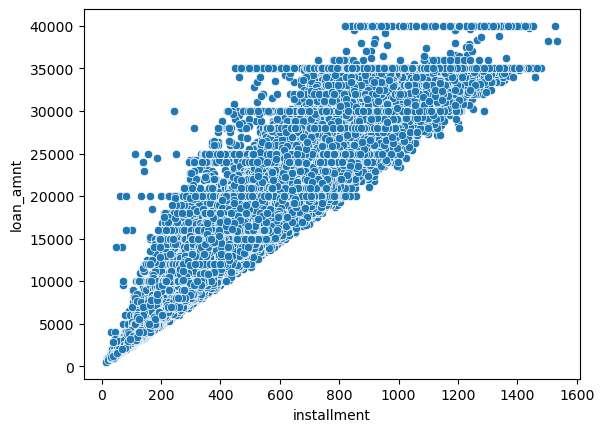

In [10]:
##Installment and loan amount have very high correlation
sns.scatterplot(data=df, y= 'loan_amnt', x = 'installment')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

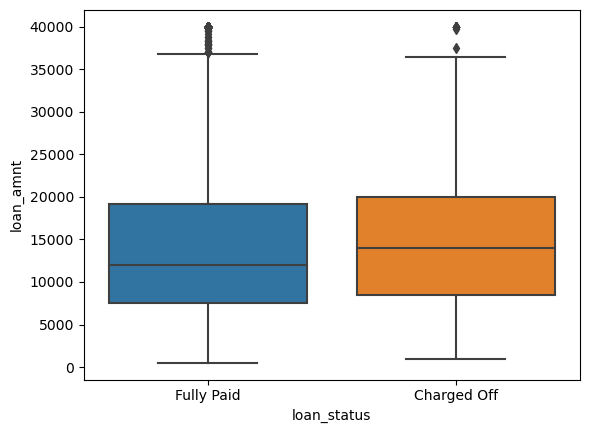

In [11]:
##checking the relationship between loan amount and loan status
sns.boxplot(data=df, x = 'loan_status', y = 'loan_amnt')

In [12]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [13]:
sorted(df['grade'].unique()) ##Checking all possible grade values

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [14]:
sorted(df['sub_grade'].unique()) ##Checking all possible sub grade values

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

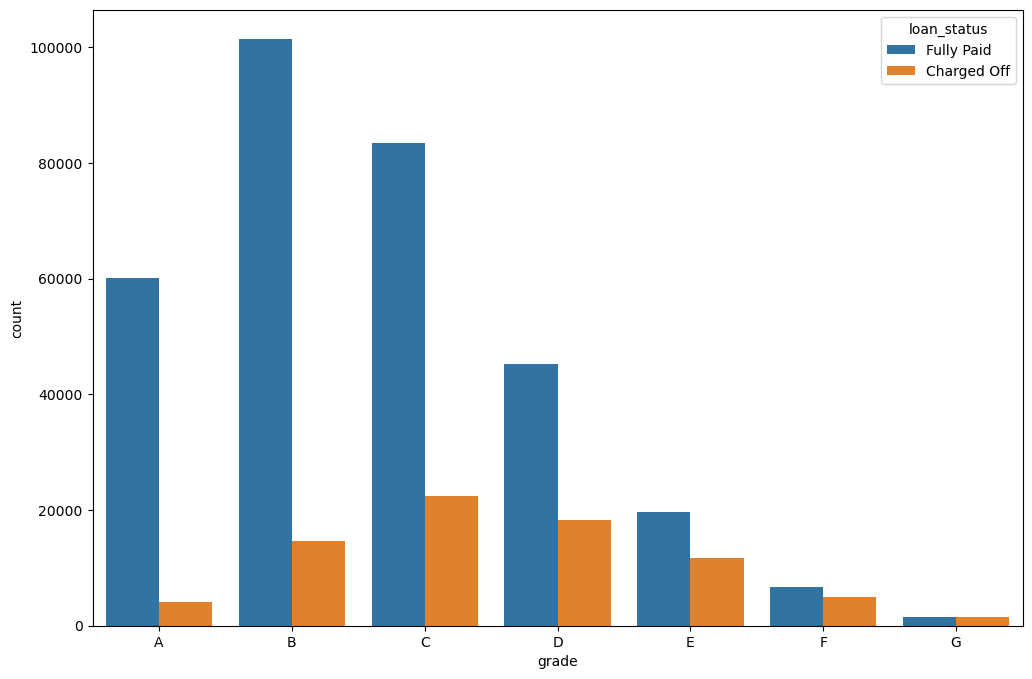

In [15]:
##Ordered countplot for the grades based on the loan status
plt.figure(figsize=(12,8))
grad_order = sorted(df['grade'].unique())
sns.countplot(data=df, x = 'grade', hue='loan_status', order = grad_order)

<Axes: xlabel='sub_grade', ylabel='count'>

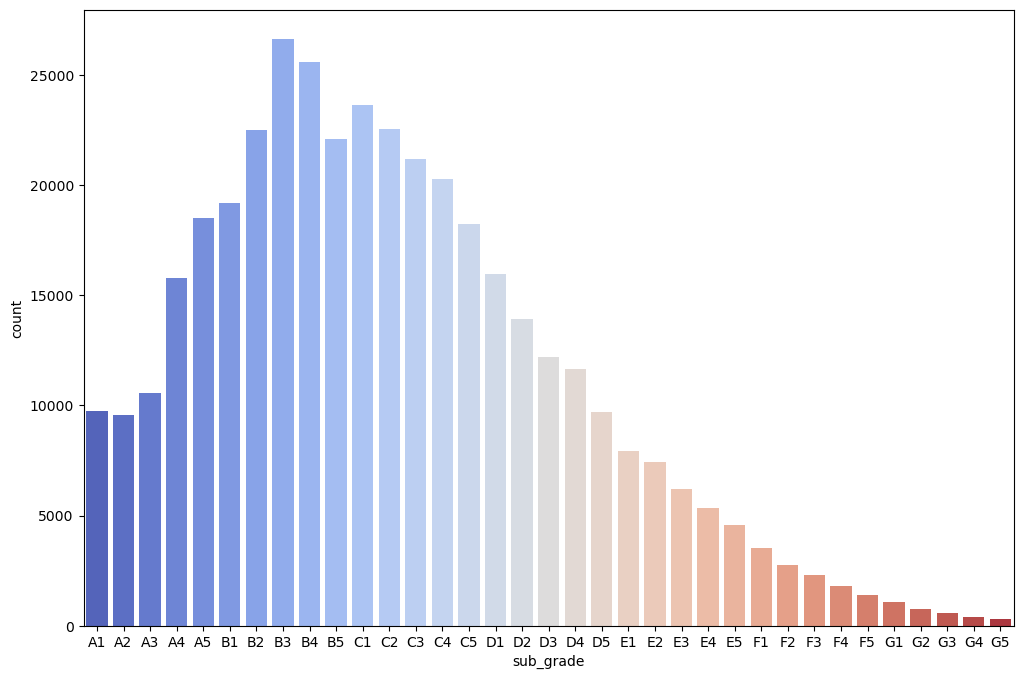

In [16]:
##ordered countplot of the subgrades
plt.figure(figsize=(12,8))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x = 'sub_grade', order = sub_grade_order, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

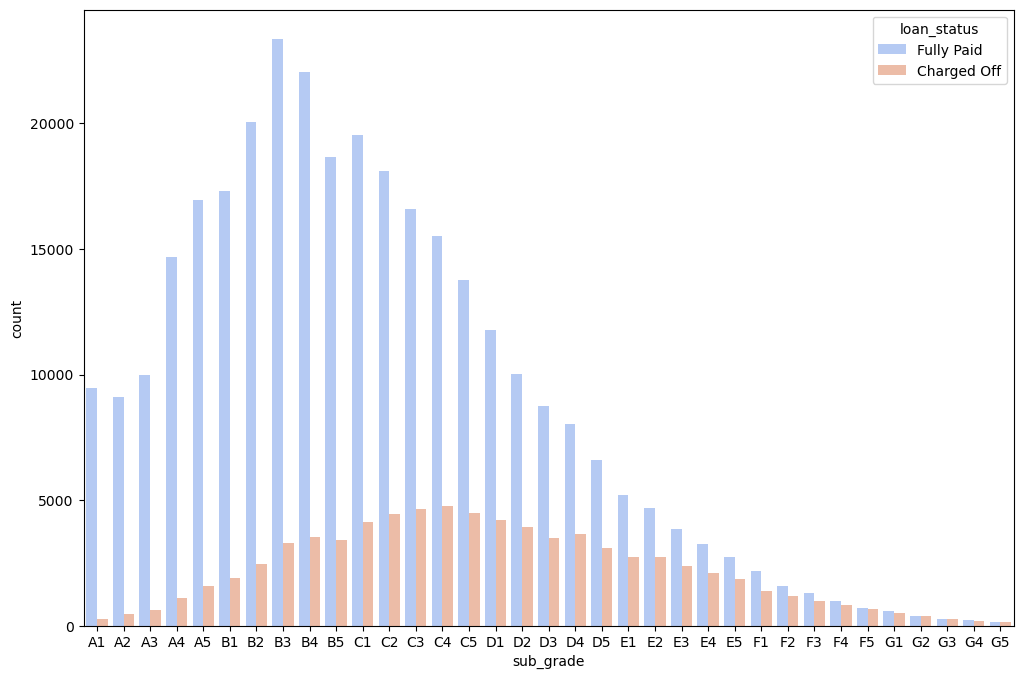

In [17]:
##ordered countplot of the subgrades based on the loan status
plt.figure(figsize=(12,8))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x = 'sub_grade', order = sub_grade_order, palette='coolwarm', hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

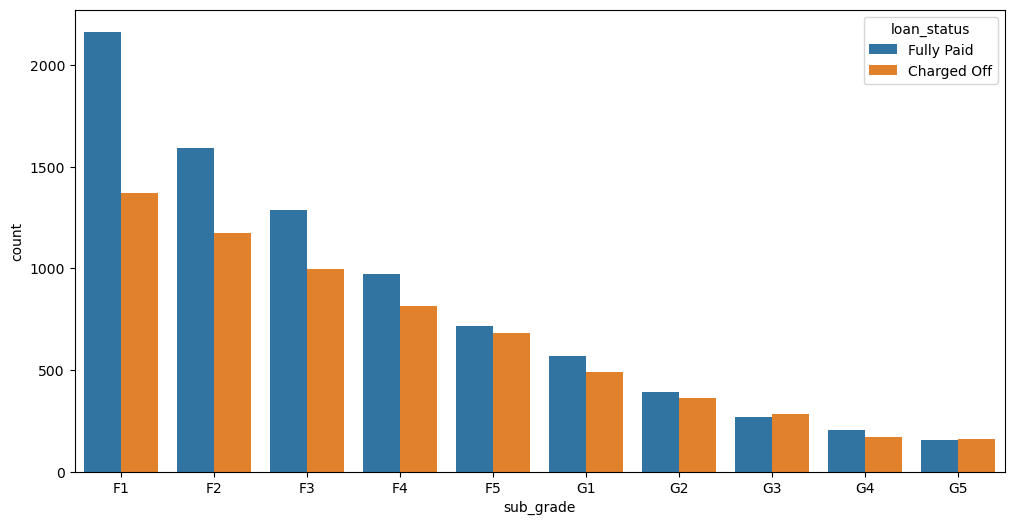

In [18]:
##Since F and G don't get back that many returns, lets explore them
f_OR_g = df[(df['grade']=='F') | (df['grade']=='G')]
plt.figure(figsize=(12,6))
sub_grade_order = sorted(f_OR_g['sub_grade'].unique())
sns.countplot(data=f_OR_g, hue = 'loan_status',x = 'sub_grade', order = sub_grade_order)

In [19]:
##Creating a new loan_repaid column to show 1 if the loan is paid and 0 if the loan is charged 
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [20]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [21]:
df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [22]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


<Axes: >

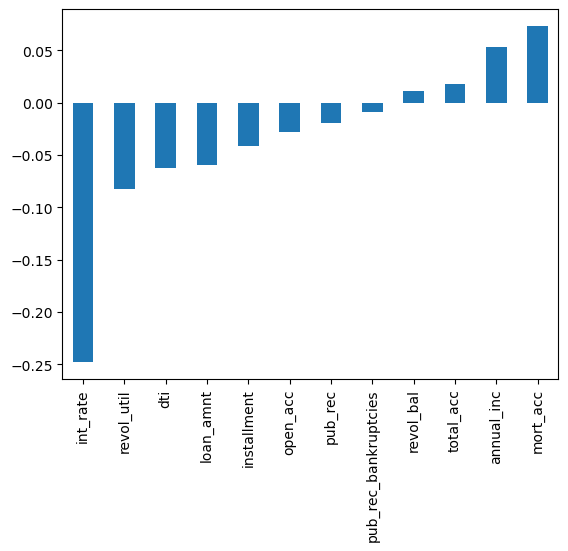

In [37]:
##Correlation between the numeric features and the new loan repaid feature
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Data Preoprocessing

In [38]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
##Examining emp_length and emo_title
df['emp_title'].nunique()

173105

In [45]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [47]:
##Too many different  jobs that I should just drop this column
df = df.drop('emp_title', axis=1)

In [49]:
##Emp_length feature
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [56]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']


<Axes: xlabel='emp_length', ylabel='count'>

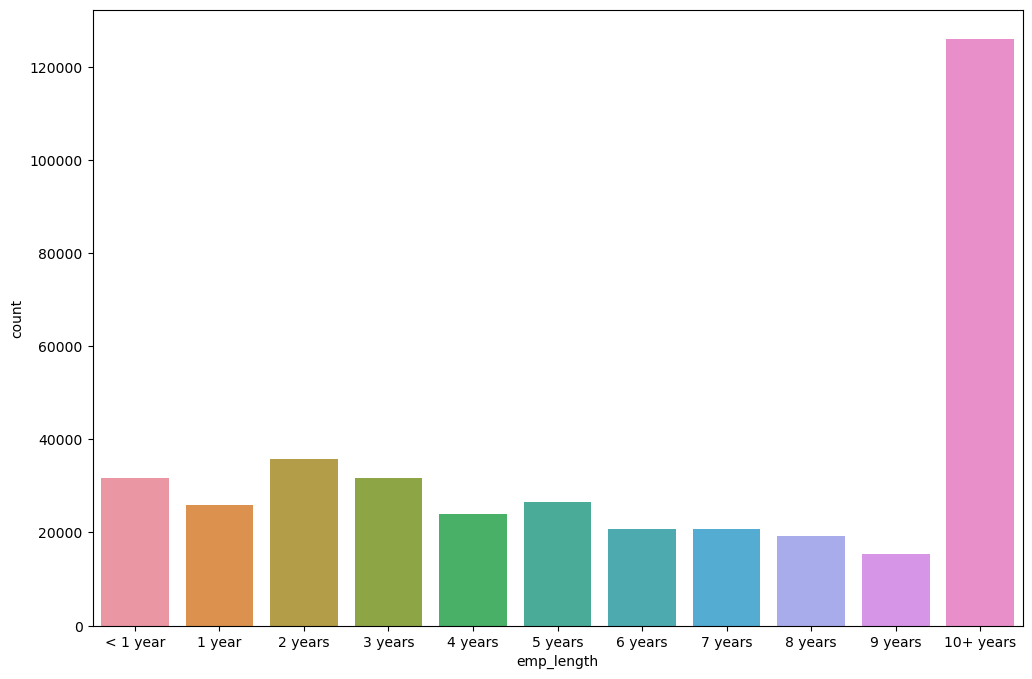

In [57]:
##Creating a countplot for emp_length
plt.figure(figsize=(12,8))
sns.countplot(data=df, order=emp_length_order, x='emp_length')

<Axes: xlabel='emp_length', ylabel='count'>

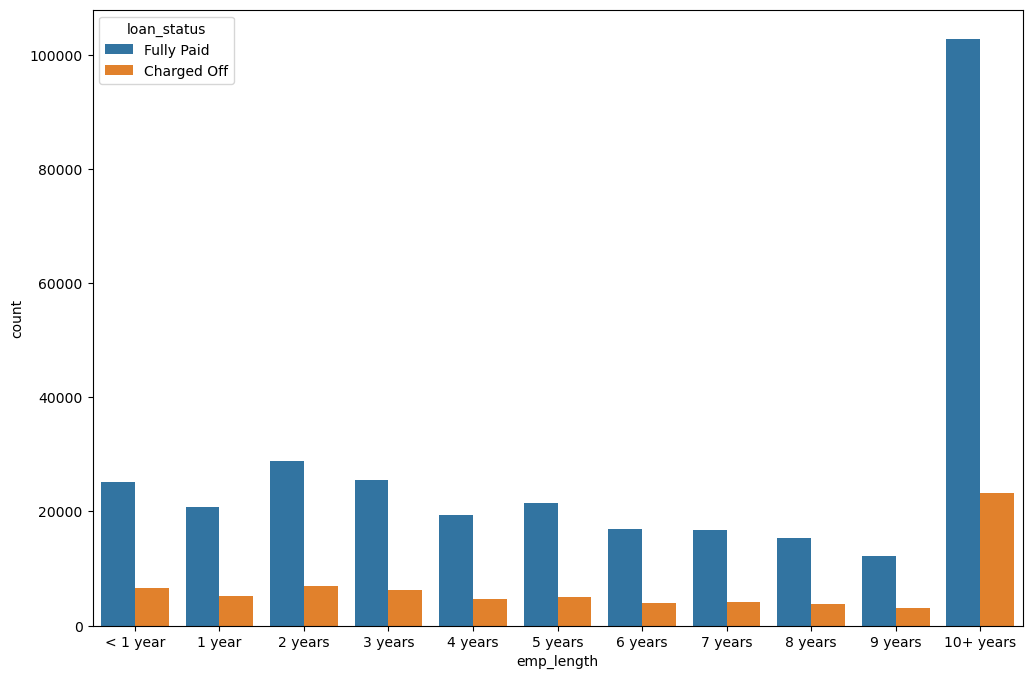

In [58]:
##Creating a countplot for emp_length with hue as loan_status
plt.figure(figsize=(12,8))
sns.countplot(data=df, order=emp_length_order, x='emp_length', hue='loan_status')

In [61]:
##let us check the percentage of the people per employment category that did not pay back their loans
emp_len_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [62]:
emp_len_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [63]:
emp_len_average = emp_len_co/emp_len_fp

<Axes: xlabel='emp_length'>

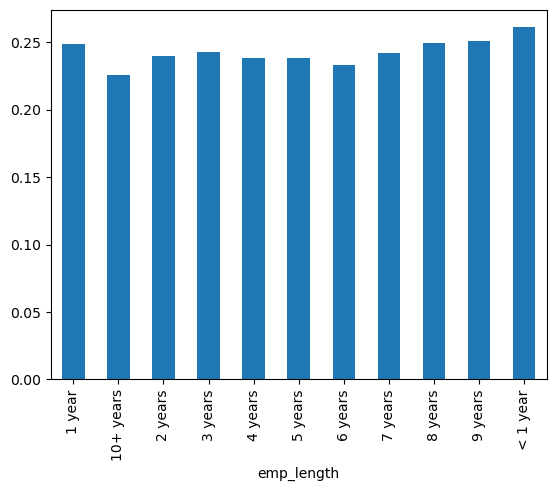

In [65]:
emp_len_average.plot(kind='bar')

In [66]:
##Since the charge off rates are very similar acros all lengths, we can drop this feature
df = df.drop('emp_length', axis=1)

In [67]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [69]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [76]:
df.iloc[:,10:]

,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [77]:
##Since purpose and titles are the same features, i can drop title as it has missing values
df = df.drop('title', axis=1)

In [78]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [79]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [81]:
##Let us check out the mortal_acc feature.
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

<Axes: >

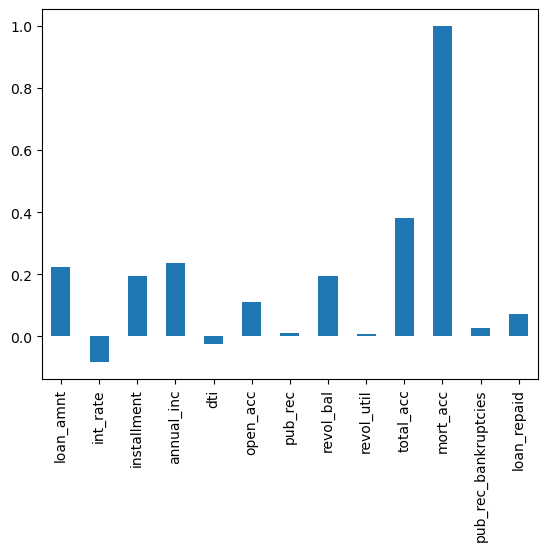

In [85]:
df.corr(numeric_only=True)['mort_acc'].plot(kind='bar')

In [97]:
# From the graph we can see that total_acc has the highest correlation with mortal_acc and to fill that much data in mort_acc
# we can fill it based on the mean of total_acc

total_acc_average = df.groupby(by = 'total_acc')['mort_acc'].mean()

In [98]:
total_acc_average

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [99]:
##now we create a function to fill in the average total_acc value for the same row where mort_acc is nan

def fill_total_ave(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_average[total_acc]
    else:
        return mort_acc

In [100]:
df['mort_acc'] = df.apply(lambda x: fill_total_ave(x['total_acc'], x['mort_acc']), axis=1)

In [101]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [104]:
df['revol_util']

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [103]:
df['pub_rec_bankruptcies']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

In [106]:
df = df.dropna()

In [109]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Dummy and Categorical variables

In [116]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### #1 Term

In [118]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [120]:
df['term'][0][:3]

' 36'

In [121]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\Users\bhati\AppData\Local\Temp\ipykernel_48624\2179920926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [122]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

#### #2 Grade

In [123]:
##Since grade is a part of sub_grade, I feel we can drop it
df = df.drop('grade', axis=1)

#### #3 Sub grade

In [126]:
df['sub_grade'].value_counts()

sub_grade
B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: count, dtype: int64

In [127]:
##I think we will need to create dummy variables for this feature
subgrade_dummy = pd.get_dummies(df['sub_grade'], drop_first=True)

In [128]:
df = df.drop('sub_grade', axis=1)

In [130]:
df = pd.concat([df, subgrade_dummy], axis=1)

In [133]:
df.head().columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

#### #4 Home ownership

In [135]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [136]:
##I think none and any can be a part od the 'other' feature and hence can be replaced by other so that we can cut down on some columns
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [137]:
home_dummy = pd.get_dummies(df['home_ownership'], drop_first=True)

In [138]:
df = df.drop('home_ownership', axis=1)

In [139]:
df= pd.concat([df, home_dummy], axis=1)

In [140]:
df.head().columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

#### #5 verification_status

In [141]:
df['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [142]:
verification_dummy = pd.get_dummies(df['verification_status'], drop_first=True)
df= df.drop('verification_status', axis=1)
df = pd.concat([df, verification_dummy], axis=1)

In [143]:
df.head().columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'Source Verified', 'Verified'],
      dtype='object')

#### #6 Issue date

In [144]:
df['issue_d'].value_counts()

issue_d
Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: count, Length: 112, dtype: int64

In [145]:
##Since issue date feature is kind of a data leak for the model as it tells if a loan would be issued
df = df.drop('issue_d', axis=1)

In [147]:
df.head().columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'Source Verified', 'Verified'],
      dtype='object')

In [148]:
df.select_dtypes(include='object').columns

Index(['loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### #7 Loan status

In [149]:
##We can drop loan status feature as it is the same as loan repaid
df = df.drop('loan_status', axis=1)

In [150]:
df.select_dtypes(include='object').columns

Index(['purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### #8 Purpose

In [154]:
df['purpose'].value_counts()

purpose
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: count, dtype: int64

In [155]:
purpose_dummy = pd.get_dummies(df['purpose'], drop_first=True)
df= df.drop('purpose', axis=1)
df = pd.concat([df, purpose_dummy], axis=1)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'Source Verified', 'Verified', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'],
      dtype='object')

In [157]:
df.select_dtypes(include='object').columns

Index(['earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

#### #9 Earlest credit line

In [158]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [160]:
df['earliest_cr_line'][0][-4:]

'1990'

In [161]:
##Let us extract the year part os this feature and create a new column for it
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda year: int(year[-4:]))

In [163]:
df = df.drop('earliest_cr_line', axis=1)

In [164]:
df.select_dtypes(include='object').columns

Index(['initial_list_status', 'application_type', 'address'], dtype='object')

#### #10 Initial list status

In [165]:
df['initial_list_status'].value_counts()

initial_list_status
f    237346
w    157873
Name: count, dtype: int64

In [166]:
initial_dummy = pd.get_dummies(df['initial_list_status'], drop_first=True)
df= df.drop('initial_list_status', axis=1)
df = pd.concat([df, initial_dummy], axis=1)

In [167]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'OTHER', 'OWN', 'RENT', 'Source Verified', 'Verified',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding',
       'earliest_cr_year', 'w'],
      dtype='object')

In [168]:
df.select_dtypes(include='object').columns

Index(['application_type', 'address'], dtype='object')

#### #11 Application type

In [169]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [170]:
application_dummy = pd.get_dummies(df['application_type'], drop_first=True)
df= df.drop('application_type', axis=1)
df = pd.concat([df, application_dummy], axis=1)

In [171]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN',
       'RENT', 'Source Verified', 'Verified', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'earliest_cr_year', 'w',
       'INDIVIDUAL', 'JOINT'],
      dtype='object')

In [172]:
df.select_dtypes(include='object').columns

Index(['address'], dtype='object')

#### #12 Address

In [173]:
df['address'].value_counts()

address
USCGC Smith\nFPO AE 70466                            8
USS Smith\nFPO AP 70466                              8
USS Johnson\nFPO AE 48052                            8
USNS Johnson\nFPO AE 05113                           8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: count, Length: 392898, dtype: int64

In [175]:
df['address'][0][-5:]

'22690'

In [176]:
##Let us get jsut the zipcode from the whole address as the rest is not useful
df['zipcode'] = df['address'].apply(lambda zip: zip[-5:])

In [177]:
df['zipcode'].value_counts()

zipcode
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [179]:
zip_dummy = pd.get_dummies(df['zipcode'], drop_first=True)
df= df.drop('zipcode', axis=1)
df = pd.concat([df, zip_dummy], axis=1)

In [180]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN',
       'RENT', 'Source Verified', 'Verified', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'earliest_cr_year', 'w',
       'INDIVIDUAL', 'JOINT', '05113', '11650', '22690', '29597', '30723',
       '48052', '70466', '86630', '93700'],
      dtype='object')

In [182]:
df = df.drop('address', axis=1)

In [183]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

## Train Test Split

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the data

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
scaler = MinMaxScaler()

In [191]:
X_train= scaler.fit_transform(X_train)

In [192]:
X_test= scaler.transform(X_test)

## Creating the model

In [193]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.kerasras.constraints import max_norm

In [194]:
model = Sequential()

#input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam')

In [195]:
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test), batch_size=256)

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3637 - val_loss: 0.2646
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2675 - val_loss: 0.2629
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2645 - val_loss: 0.2623
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2619 - val_loss: 0.2622
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2623 - val_loss: 0.2625
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2601 - val_loss: 0.2614
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2598 - val_loss: 0.2616
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2575 - val_loss: 0.2617
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2591 - val_loss: 0.2616
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2585 - val_loss: 0.2613
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2571 - val_loss: 0.2608
Epoch 12/25
1236/1236 ━━━━━━━

## Saving the model

In [196]:
from tensorflow.keras.models import load_model

In [197]:
model.export('loan_payback_model_savemodel')

INFO:tensorflow:Assets written to: loan_payback_model_savemodel\assets


INFO:tensorflow:Assets written to: loan_payback_model_savemodel\assets


Saved artifact at 'loan_payback_model_savemodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 78), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2594474884288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2594474883936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2594474883760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2594474884816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2594496430320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2594496431376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2594496431024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2594496431552: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [198]:
k_loan_pay = tf.saved_model.load('loan_payback_model_savemodel')

## Evaluation of the model

In [199]:
from sklearn.metrics import confusion_matrix, classification_report

In [200]:
losses = pd.DataFrame(model.history.history)

<Axes: >

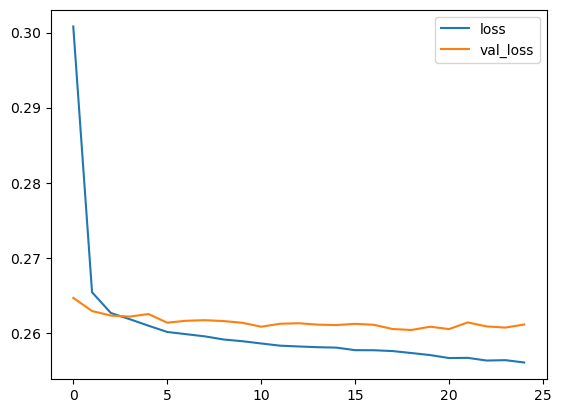

In [201]:
losses.plot()

In [202]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [204]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, predictions))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [205]:
print('CONFUSION MATRIX\n')
print(confusion_matrix(y_test, predictions))

CONFUSION MATRIX

[[ 6818  8840]
 [   81 63305]]


## Predicting a customer

In [206]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.0
term                60
int_rate         18.24
installment     638.11
annual_inc     61665.0
                ...   
30723             True
48052            False
70466            False
86630            False
93700            False
Name: 305323, Length: 78, dtype: object

In [207]:
input_tensor = tf.constant(new_customer.values.reshape(1,78), dtype=tf.float32)

In [209]:
result = k_loan_pay.signatures['serving_default'](keras_tensor=input_tensor)

In [219]:
##my model's prediction
prediction = result['output_0'].numpy()
print("Prediction:", int(prediction[0]))
print("Actual Answer:", df.iloc[random_ind]['loan_repaid'])

Prediction: 1
Actual Answer: 1
